In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import eda
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

In [2]:
filename = '../data/train.csv'
df = pd.read_csv(filename, index_col='date', parse_dates=True)
print('Shape of data frame {}'.format(df.shape))
print(df.head())

Shape of data frame (913000, 3)
            store  item  sales
date                          
2013-01-01      1     1     13
2013-01-02      1     1     11
2013-01-03      1     1     14
2013-01-04      1     1     13
2013-01-05      1     1     10


In [5]:
#Statistics by store
stores_sum = df.groupby('store')['sales'].sum()
print(stores_sum)

store
1     4315603
2     6120128
3     5435144
4     5012639
5     3631016
6     3627670
7     3320009
8     5856169
9     5025976
10    5360158
Name: sales, dtype: int64


In [8]:
stores_stats = df.groupby('store')['sales'].describe()
print(stores_stats)

         count       mean        std  min   25%   50%   75%    max
store                                                             
1      91300.0  47.268379  24.006252  1.0  28.0  44.0  63.0  155.0
2      91300.0  67.033165  33.595810  3.0  40.0  62.0  89.0  231.0
3      91300.0  59.530602  29.974102  3.0  35.0  55.0  80.0  196.0
4      91300.0  54.902946  27.733097  4.0  32.0  51.0  73.0  186.0
5      91300.0  39.770164  20.365757  2.0  23.0  37.0  53.0  130.0
6      91300.0  39.733516  20.310451  0.0  23.0  37.0  53.0  134.0
7      91300.0  36.363735  18.684825  1.0  21.0  34.0  49.0  122.0
8      91300.0  64.142048  32.231751  4.0  38.0  60.0  86.0  204.0
9      91300.0  55.049025  27.832186  4.0  32.0  51.0  74.0  195.0
10     91300.0  58.709288  29.554994  3.0  35.0  54.0  78.0  187.0


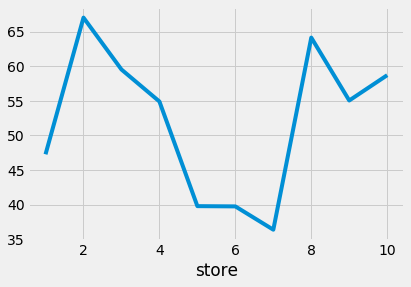

In [6]:
stores_stats['mean'].plot()

In [10]:
#Statistics by items
items_stats = df.groupby('item')['sales'].describe()

        count       mean        std   min   25%   50%    75%    max
item                                                               
1     18260.0  21.981599   8.468922   1.0  16.0  21.0   27.0   59.0
2     18260.0  58.574151  20.093015   9.0  44.0  56.0   71.0  150.0
3     18260.0  36.642223  13.179441   7.0  27.0  35.0   45.0  104.0
4     18260.0  22.010241   8.403898   0.0  16.0  21.0   27.0   66.0
5     18260.0  18.358708   7.265167   1.0  13.0  18.0   23.0   50.0
6     18260.0  58.503888  20.174898  11.0  43.0  56.0   72.0  148.0
7     18260.0  58.531051  20.146002  11.0  44.0  56.0   71.0  141.0
8     18260.0  76.950055  26.130697  15.0  57.0  74.0   94.0  181.0
9     18260.0  51.389869  17.790158   6.0  38.0  49.5   63.0  134.0
10    18260.0  73.227437  24.823725  14.0  55.0  70.0   89.0  175.0
11    18260.0  69.656353  23.744732  11.0  52.0  67.0   85.0  170.0
12    18260.0  69.634940  23.738663  12.0  52.0  67.0   85.0  170.0
13    18260.0  84.316594  28.311031  20.0  63.0 

In [13]:
#Subsetting data
df_sub = eda.df_subset(df, store=2, item=2, t_start='2013-01', t_end='2017-12')

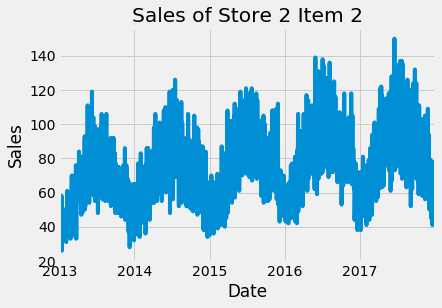

In [14]:
eda.plot_store_item(df_sub)

In [17]:
df_sub.describe()

,store,item,sales
count,1826.0,1826.0,1826.000000
mean,2.0,2.0,75.316539
std,0.0,0.0,20.332268
min,2.0,2.0,26.000000
25%,2.0,2.0,61.000000
50%,2.0,2.0,74.000000
75%,2.0,2.0,88.750000
max,2.0,2.0,150.000000


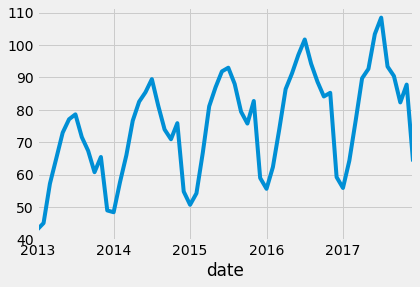

In [21]:
#Monthly average
df_sub_monthly_mean = eda.df_subset_monthly_mean(df_sub)
df_sub_monthly_mean['sales'].plot()

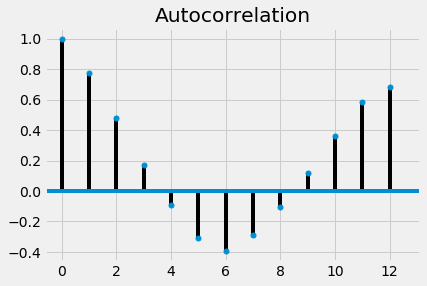

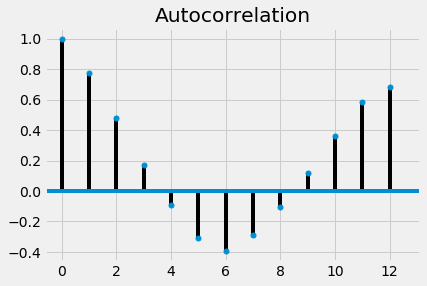

In [22]:
# Plot the autocorrelation
plot_acf(df_sub_monthly_mean['sales'], alpha = 1, lags=12)

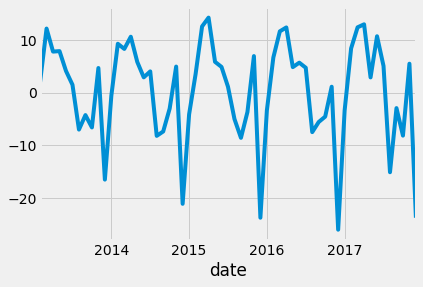

In [24]:
#Integrated of order 1, denoted by parametemer d in ARIMA model
df_diff = df_sub_monthly_mean.diff(periods=1).dropna()
df_diff['sales'].plot()

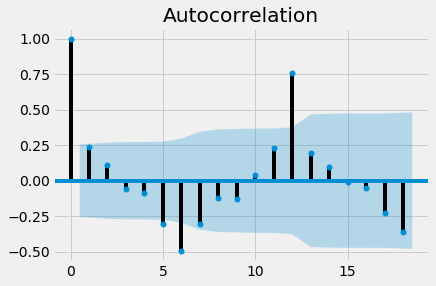

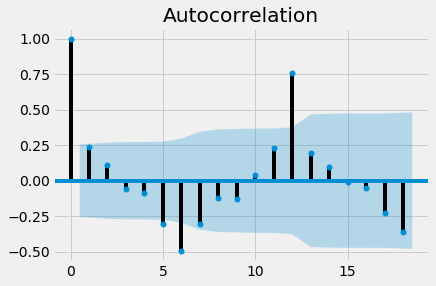

In [25]:
plot_acf(df_diff['sales'])

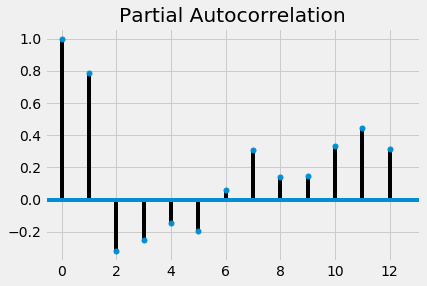

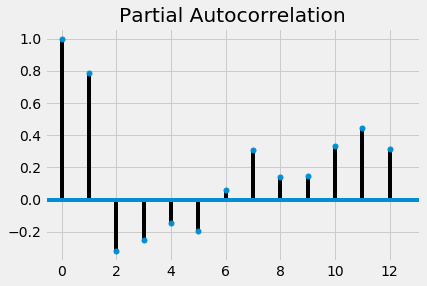

In [34]:
# plot partial ACF (PACF)
plot_pacf(df_sub_monthly_mean['sales'], alpha = 1, lags=12)

In [30]:
#Split train/test
train = df_sub_monthly_mean['sales']

In [32]:
#Fit AR model
mod = ARIMA(train, order = (10,0,0))
result = mod.fit()
print(result.summary())
#print(result.params)

                              ARMA Model Results                              
Dep. Variable:                  sales   No. Observations:                   60
Model:                    ARMA(10, 0)   Log Likelihood                -201.225
Method:                       css-mle   S.D. of innovations              6.608
Date:                Mon, 18 May 2020   AIC                            426.450
Time:                        14:55:28   BIC                            451.582
Sample:                    01-31-2013   HQIC                           436.280
                         - 12-31-2017                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           73.3753      7.892      9.297      0.000      57.907      88.843
ar.L1.sales      0.8352      0.121      6.924      0.000       0.599       1.072
ar.L2.sales     -0.0733      0.165     -0.44

Akaike  information creteria (AIC) =  426.4495497979866
Bayesian information creteria (BIC) =  451.5816845446518


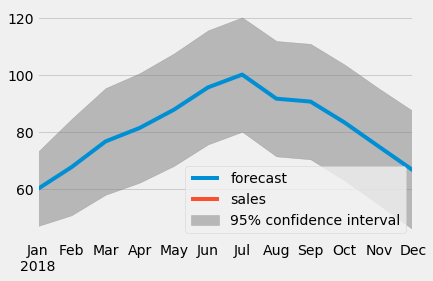

In [36]:
#Forecasting
result.plot_predict(start = '2018-01-31', end = '2018-12-31')
# get Akaike  information creteria (AIC) and Bayesian information creteria (BIC)
print('Akaike  information creteria (AIC) = ', result.aic)
print('Bayesian information creteria (BIC) = ', result.bic)

In [38]:
# MA model
model_ma = ARIMA(train, order=(0,0,10)) # reverse order with AR model
model_ma_fit = model_ma.fit()
print(model_ma_fit.summary())
#print(model_ma_fit.params)

                              ARMA Model Results                              
Dep. Variable:                  sales   No. Observations:                   60
Model:                    ARMA(0, 10)   Log Likelihood                -201.369
Method:                       css-mle   S.D. of innovations              5.743
Date:                Mon, 18 May 2020   AIC                            426.739
Time:                        15:01:16   BIC                            451.871
Sample:                    01-31-2013   HQIC                           436.569
                         - 12-31-2017                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           71.0452     14.282      4.975      0.000      43.053      99.037
ma.L1.sales      1.5042      0.184      8.166      0.000       1.143       1.865
ma.L2.sales      1.9581      0.316      6.20

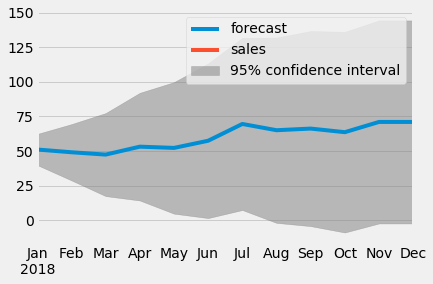

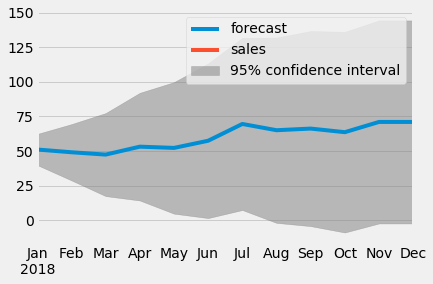

In [39]:
model_ma_fit.plot_predict(start='2018-01-31', end='2018-12-31')
#model_ma_forecast = result.forecast(steps=12)[0]
#plt.plot(model_ma_forecast)

In [67]:
#ARIMA Model
#model parameters (p, d, q)
# p: a period taken for autoregressive (AR) model
# d: Integrated order, differencing (typically 1 or 2)
# period in moving average (MA) model
model_arima = ARIMA(train, order=(7,2,2)) #best aic 330 with pdq (7,2,7)
model_fit = model_arima.fit()

In [68]:
print(model_fit.aic)
#mean_squared_error(test, prediction)

431.42371457595186


In [70]:
eda.find_best_pdq(train, max_p=10, max_d=2, max_q=10)

(0, 0, 0) 504.2038111947483
(0, 0, 1) 464.2066596419955
(0, 0, 2) 444.4963567449079
(0, 0, 3) 437.6014257072307
(0, 0, 4) 433.75644342685933
(0, 0, 5) 433.9259436159516
(0, 0, 6) 432.79950707957926
(0, 0, 7) 427.4859570734169
(0, 0, 8) 435.7936059097
(0, 0, 9) 429.2316673579303
(0, 0, 10) 426.7387032650481
(0, 1, 0) 438.5193640686432
(0, 1, 1) 437.4387867723302
(0, 1, 2) 438.34616095312094
(0, 1, 3) 439.8557236816167
(0, 1, 4) 432.5394192667337
(0, 1, 5) 427.1225702059969
(0, 1, 6) 428.573898809561
(0, 1, 7) 425.2585956349453
(0, 1, 8) 426.7247217539815
(0, 2, 0) 452.5312760291359
(0, 2, 1) 437.16035588544844
(0, 2, 2) 435.8666554955036
(0, 2, 3) 436.61452367243993
(0, 2, 4) 438.2990090403707
(0, 2, 5) 439.30090789706026
(0, 2, 6) 429.50416426492745
(0, 2, 7) 436.2071311458898
(0, 2, 8) nan
(0, 2, 9) nan
(0, 2, 10) nan
(1, 0, 0) 444.03912350415845
(1, 0, 1) 440.7614669559776
(1, 0, 2) 439.11672495139135
(1, 0, 3) 441.11644821385073
(1, 0, 4) 441.60443848097236
(1, 0, 5) 436.77600037215